In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:/users/admin/downloads/sonar.csv',names=range(0,61),header=0)

In [3]:
data=pd.DataFrame(data=data)
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [19]:
data.skew()

0     2.122983
1     2.149965
2     2.645849
3     3.397590
4     2.020369
5     1.243828
6     0.977346
7     1.482755
8     1.654558
9     1.278532
10    0.980388
11    0.580918
12    0.730580
13    1.028081
14    0.761921
15    0.687003
16    0.648143
17    0.518349
18    0.282680
19   -0.089670
20   -0.253902
21   -0.398178
22   -0.605569
23   -0.698045
24   -0.787297
25   -0.673803
26   -0.625869
27   -0.608543
28   -0.438803
29   -0.142382
30    0.265875
31    0.304906
32    0.429747
33    0.576483
34    0.602241
35    0.631304
36    0.691936
37    1.051649
38    0.920842
39    0.856537
40    0.866684
41    0.858517
42    0.911296
43    1.258602
44    1.371554
45    1.700582
46    1.783552
47    1.287541
48    1.266425
49    1.776935
50    2.724246
51    2.098458
52    1.053124
53    1.102569
54    1.782651
55    1.810948
56    1.685823
57    2.094443
58    1.736231
59    2.769687
dtype: float64

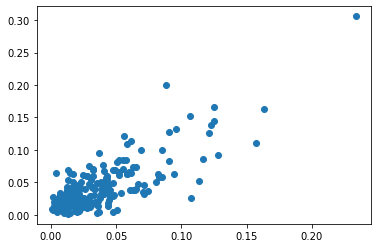

In [4]:
import matplotlib.pyplot as plt
plt.scatter(data.iloc[:,1],data.iloc[:,2])
plt.show()

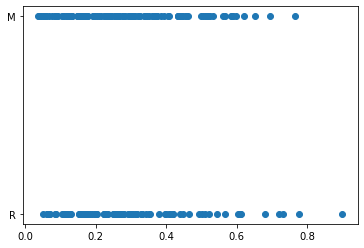

In [5]:
plt.scatter(data.iloc[:,40],data.iloc[:,-1])
plt.show()

<AxesSubplot:>

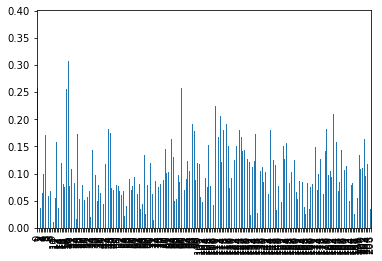

In [6]:
data[5].plot.bar()

<AxesSubplot:>

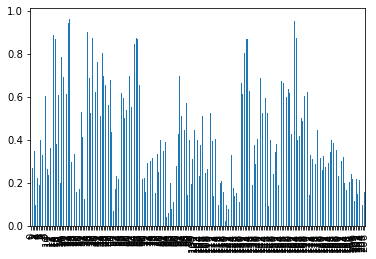

In [7]:
data[33].plot.bar()

In [8]:
x=data.iloc[:,0:-1]
x.shape

(207, 60)

In [9]:
pca=PCA(n_components=10)

In [10]:
x=pca.fit_transform(x)
x.shape

(207, 10)

In [22]:
x=pd.DataFrame(x)

In [23]:
x.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.299782,1.706064,2.152368,0.358625,0.997108,0.727071,-0.842246,1.794472,0.021928,-0.454299
1,-0.434609,1.470055,0.591473,2.593655,0.326857,-0.965406,-1.565023,0.378033,0.071848,-2.375558
2,1.143433,1.169729,-0.061172,-0.368412,-1.948042,1.262019,1.774328,-1.004507,-2.704545,-2.336259
3,-0.082166,0.378940,1.646347,0.456411,0.503293,0.290964,-1.389681,0.327072,0.605049,-2.348888
4,-0.811017,1.512111,2.085286,0.811582,1.656176,1.665949,-0.834532,0.491960,-1.027419,-1.291525


In [24]:
x.skew()

0    0.182486
1    0.412060
2    0.182902
3    0.438051
4   -0.057592
5    0.283933
6    0.415527
7    0.060027
8    0.226722
9   -0.297189
dtype: float64

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scale=StandardScaler()

In [13]:
x=scale.fit_transform(x)

In [14]:
y=data.iloc[:,-1]
y.shape

(207,)

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
lg=LogisticRegression()
sv=SVC()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
model=[lg,sv,gnb,dtc]

In [30]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.8043478260869565
[[23  1]
 [ 8 14]]
              precision    recall  f1-score   support

           0       0.74      0.96      0.84        24
           1       0.93      0.64      0.76        22

    accuracy                           0.80        46
   macro avg       0.84      0.80      0.80        46
weighted avg       0.83      0.80      0.80        46



Accuracy score of SVC() is:
0.8913043478260869
[[23  1]
 [ 4 18]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        24
           1       0.95      0.82      0.88        22

    accuracy                           0.89        46
   macro avg       0.90      0.89      0.89        46
weighted avg       0.90      0.89      0.89        46



Accuracy score of GaussianNB() is:
0.782608695652174
[[21  3]
 [ 7 15]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        24
           1  

In [28]:
import joblib

In [31]:
joblib.dump(sv,'svsonar.obj')

['svsonar.obj']

In [33]:
svfile=joblib.load('svsonar.obj')
svfile.predict(x_train)

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0])